# Python básico para AI

VScode, 

Jamais faça deploy de notebook em produção. notebook é pra prototipação não para deploy

Google colab

Usar o codespaces dentro do github pois é ubuntu/linux

para criar o ambiente virtual:
- python -m venv venv
  
para ativar
- source venv/bin/activate

para instalar bibliotecas pode usar o poetry ou pip instal dentro do venv

List comprehension
- "expressao com variavel" for "variavel" in "iterável" if condição
- ex: lista = [x**2 for x in range(11) if x % 2 ==0]

dict comprehension
```python
nomes = ["rapha", "maria", "jose"]
idades = [18, 24, 30]
dicionario = {k:v for (k,v) in zip(nomes,idades) if k != 'rapha'}
```

## Generators

ex: range

```python
def my_generator(max_num):
    x = 0
    while x < max_num:
        yield x
        x += 1
gen = my_generator(3)
print(next(gen))
```
nesse caso não usa memória

## packages e módulos

- um arquivo .py é um módulo
- boa prática:
  - if __name__ == '__main__':
  - nao importar usando *


## pandas

### series
serie2 = serie.apply(funcao) - jeito ruim

serie2 = serie.apply(lambda x: x**2)

### dataframes

df = pd.DataFrame([serie1, serie2])

df = pd.DataFrame({
    "nome": ["rapha", "maria", "joao"],
    "estado": ["sp", "sp", "rj"],
    "renda": [50_000, 400_000, 1_000_000]
})

filtrando:

df[(df['Peso'] > 60) & (df['renda'] > 50000)]["renda"].mean()


### carregando e salvando arquivo de dados

pd.read_csv ou pd.read_excel ou pd.read_json

df.to_csv("exemplo.csv", index=False)

df.to_excel("exemplo.xlsx", index=False, sheet_name="dados")

df.to_json("exemplo.json", index=False, orient="records")


### loc e iloc

loc navega por indice de linha ou coluna

loc aceita filtro

iloc navega por posições

iloc é mais usado

usa indice: ou :indice ou indice:indice para fatiar

### renomeando colunas

temp = {"Nome":"nome", "Idade":"idade"}

df = df.rename(columns=temp)

evite mexer nos indices com set_index e coisas assim

### lidando com nulos

.info()

isna().sum()

df.fillna({"nome":"desconhecido", "idade":df["idade"].mean(), "cidade":"nao informada"})

.dropna()


### apply e map

apply pega uma função e aplica para tudo

```python
def aumentar_salario(salario):
    return salario * 1,1

df['salario_ajustado'] = df['salario'].apply(aumentar_salario)

# ou usando funcao anonima

df['salario_ajustado'] = df['salario'].apply(lambda salario: salario * 1,2)

df['departmento'].value_counts()

# map mapeia estrutura de uma coluna para outra, passando um dicionario de como corresponder

temp = {
    "marketing": "diretoria financeira",
    "vendas": "diretoria comercial",
}

df["diretoria"] = df["departamento"].map(temp)

```

### groupby

groupby(coluna ou lista de colunas)[coluna ou lista de colunas a trazer].operacao()

groupby(coluna ou lista de colunas).agg({'salario_ajustado':['count', 'sum', 'mean','std, 'min','max']})

### concat, merge, join

concat é uniao simples (um em cima do outro ou um ao lado do outro)

df_concat = pd.concat([df1,df2]) - usar axis=1 para coloar ao lado e nada ou axis=0 para colocar embaixo

para juntar informacoes com base em uma coluna comum usar o merge

df_merge = pd.merge(df1,df3,on="ID") - usar how= para definir como dar o merge

join é usado quando podemos usar o index do dataframe para unir as tabelas

df_join = df1.join(df3, how='left')


# EDA

.describe()

.nunique()

df["departamento"].value_counts()

df[["idade","salario"]].corr()

# datas

df['coluna'] = pd.to_datetime(df['coluna'])

dt.year, dt.month, dt.day, dt.month_name()

test = pd.date_range(start='2024-01-01', end='2024-12-01', freq='M') ou freq=Q, d, h, s

# Numpy

np.array([elementos])

.ndim

.shape mostra quantos elementos em cada dimensão

e[1,2,3] para acessar o quarto item na dimensao 3, terceiro na dimensão 2 e segundo na dimensão 1

d += 1 soma 1 a todos os elementos da matriz d

np.min, np.max, np.std, np.mean

np.zeros(shape que queremos) ex: np.zeros(3,4) - cria matriz com zeros

np.ones(shape que queremos) ex: np.ones(2,3) - cria matriz com uns

np.full(shape, numero) ex: np.full(2,3, 5.65)

np.arange(shape) ex: np.arange(10,20) cria uma matriz começando em 10 e terminando em 19

np.linspace(inicial,final,qtde entre ini e fin) ex: np.linspace(0,1,5) cria uma matriz com 0, 0.25, 0.5, 0.75 e 1 (5 elementos)

np.eye(tamanho da matriz identidade) ex: np.eye(3) cria uma matriz identidade (1s na diagonal e 0s no resto) no shape 3x3

a + b soma arrays
a - b subtrai arrays
a * b multiplica arrays - não é multiplicação de matriz que precisa n linhas de 1 = n colunas da outra
a / b divide arrays

np.sin(array) retorna o seno

np.exp(array) exponencia o array

## algebra linear

np.dot(a,b) multiplica matrizes que atendam a condição ou usar np.matmul(a,b)

np.linalg.det(matriz) retorna o determinante da matriz

np.linalg.inv(matriz) retorna a matriz invertida

se multiplica uma matriz pela sua invertida, temos uma matriz identidade

para calcular autovalor e autovetor usar:

autovalor, autovetor = np.linalg.eig(matriz)

## slicing arrays

ex uma matriz a = np.array([[1,2,3] [10,20,30] [100,200,300]])

para acessar a 1a linha usar a[0,:]

para acessar a 1a coluna usar a[:,1]

para acessar todas as linhas, colunas 2 e 3 usar a[:,1:3]

filtros:

a(a>15) - retorna valores maiores que 15 - dessa forma perdemos a estrutura matricial

## reshape de arrays

matriz.T transpoe uma matriz (inverte linha e coluna)

matriz.ravel() transforma a matriz em um vetor unidimensional com todos os elementos

reshape muda a matriz mas precisa ter o mesmo número de posições da matriz original, ex matriz original 4x3 pode virar uma 6x2 mas nao uma 6x1. Multiplica os dois shapes e tem que dar o mesmo resultado (12 neste caso)

reshape não cria cópia, ele cria uma referencia, entao se mudar o reshape de uma matriz, vai alterar a matriz original além da reshapada pois não alocou outro espaço para a memória. usar para reduzir uso de memória. para criar uma cópia usamos o resize

np.resize(matriz, (linhas,colunas)) - neste caso podemos alterar pois nao muda a matriz original pois aloca outro espaço na memória

## broadcasting

usar com cautela pois é meio confuso

expande dimensoes de matrizes para que seja possivel realizar operacoes como soma com outra matriz, seja criando linhas ou colunas em uma matriz para que ela possa ser operada

podemos também multiplicar um array por um numero (produto escalar)

b * 42 irá multiplicar cada elemento de b por 42

normalização
1. calcular a média de cada coluna da matriz com np.mean(matriz, axis=0)
2. calcular desvio de cada coluna da matriz com np.std(matriz,axis=0)
3. normalizar com data_norm = (matriz - media) / std

## deep copy

usar um .copy após selecionar a fatia que se quer de uma matriz. Assim deixa de ser uma referencia e passa a ter um espaço na memoria 

cuidado ao fazer slicing, verifica se vai alterar alguma coisa na matriz e como essa alteração pode afetar a matriz original

## carregar e salvar

numpy é rápido pois usa programacao c

np.savetxt('nome.txt', variavel, fmt='%d') - fmt é o formato de número (int , decimal e quantas casas, ver documentação)

np.loadtxt('nome.txt', dtype=int) - ou float, string, etc, depende do que vc precisa

np.savetxt('nome.csv', variavel, delimiter=',', fmt='%d')

para gerar um arquivo binario
np.save('nome.npy',variavel)

para carregar
np.load('nome.npy')

## vetorização

usar calculo vetorizado é mais rapido que usar for e coisas assim

```python
def quadrado(data):
    result = np.empty(len(data))
    for i in range(len(data)):
        result[i] = data[i] ** 2
    return result

def quadrado_vec(data):
    return data ** 2

```
a segunda função é 130 vezes mais rápida que a primeira

## memmap

usar o HD alem da RAM para lidar com muitos dados. Cria arquivo no hd e pegamos parte dele para ir fazendo o processamento

np.memmap(file_name,dtype=data_type,mode='w+',shape=shape) - w é write

.fill(numero) preenche um array com um número

é uma shallow copy (referencia) se mudar em uma matriz referencia, vai mudar a original

```python
file_name = 'data.dat'
data_type = 'np.float64'
shape = (10_000,10_000)

big_array = np.memmap(file_name,dtype=data_type,mode='w+',shape=shape)
big_array.fill(5.0)
sub_big_array=big_array[:100,:100]
sub_big_array += 10
del_sub_big_array # sincroniza os dados atuais com o arquivo
del_big_array # sincroniza os dados atuais com o arquivo

big_array2 = np.memmap(file_name,dtype=data_type,mode='r',shape=shape)
big_array2[:99,:100] # tá cheio de numero 15
big_array2[:100,:100] # ta tudo numero 5, porque multiplcamos por partes

```

## funções de probabilidade e gráficos

para gerar um histograma do numpy

hist,bins = np.histogram(normal,bins=20)

para plotar com matplotlib

plt.bar(bins[:-1],hist)

# Scikit Learn

usada para DS e ML

métodos fit, transform e predict

fit treina o modelo

transform muda os dados

predict prevê

```python
from sklearn.datasets import load_iris, load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X_iris, y_iris = iris.data, iris.target
scale = StandardScaler() # escala os dados para que tenham média 0 e desvio 1
scale.fit(X_iris)
X_iris_std = scale.transform(X_iris)
model = LogisticRegression()
model.fit(X_iris, y_iris)
X_iris_std[0] # é o primeiro array de observações
y_iris[0] # é a classificação da primeira iris
model.predict(X_iris_std[0].reshape(1,-1)) # com base na primeira observação, preveja o resultado (0 no caso). O reshape é usado pq precisamos de um 2d e X_iris_std[0] tem shape de 1d
```

## normalizando dados
```python
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd

wine_data = load_wine()
X = wine_data.data
y = wine_data.target
df = pd.DataFrame(X, columns=wine_data.feature_names)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# para normalizar na mão usando standard scaler
(X_train[:,1] - X_train[:,1].mean()) / X_train[:,1].std()

# normalizar usando método standardscaler
scale = StandardScaler()

X_train_std = scale.fit_transform(X_train)

# normalizar na mao min max - todos os valores entre zero e um
(X_train[:,1] - X_train[:,1].min()) / (X_train[:,1].max() - X_train[:,1].min())

scale2 = MinMaxScaler()

X_train_min_max = scale2.fit_transform(X_train)

```

## lidando com variáveis categórias

one hot encoder e label encoder

```python
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np
import pandas as pd

data = {
    "cor": ["vermelho", "azul", "Verde", "azul", "Verde", "vermelho"],
    "tamanho": ["P", "M", "G","G", "P", "M"],
}
df = pd.DataFrame(data)
df
label_encoder = LabelEncoder() # usar mais quando as variáveis categóricas tem noção de grandeza entre elas, como tamanho da roupa
df["tamanho_trans"] = label_encoder.fit_transform(df["tamanho"])

ohe = OneHotEncoder(sparse_output=False) # nao carrega os zeros na memória
df_cor = pd.DataFrame(ohe.fit_transform(df[["cor"]]),columns=ohe.get_feature_names_out()) # criando dataframe a partir do dataframe e não da serie

```

## imputação de dados

```python
from sklearn.imput import SimpleImputer # simples, pode ficar mais sofisticado
import numpy as np
import pandas as pd

data = {
    "idade":[25, np.nan, 35, 60, 45, np.nan, 30, 56, 45],
    "salario":[50000, 60000, 75000, np.nan, 120000, 95000, np.nan, 87454, 45000],
    "depto": ["rh", "financas", "financas", "TI", np.nan, "rh", "financas", np.nan, "financas"]
}
df = pd.DataFrame(data)
df

impute_mean = SimpleImputer(strategy='mean') # media para idade em mercado de trabalho 18-60 anos faz sentido
df[["idade"]] = impute_mean.fit_transform(df[["idade"]])

inpute_median = SimpleImputer(strategy='median')
df[["salario"]] = impute_median.fit_transform(df[["salario"]]) # pq salario é cauda longa, poucos ganham muito e muitos ganham pouco

inpute_most_frequent = SimpleImputer(strategy='most_frequent') # é categórica, logo não tem média ou mediana entao vamos com a moda
df[["depto"]] = impute_most_frequent.fit_transform(df[["depto"]])
```

## binarização (simplificação do problema)

```python
from sklearn.preprocessing import Binarizer
import numpy as np
import pandas as pd

data = {
    "pontuacao": [10, 21, 30, 40, 50, 60, 70],
    "idade": [18, 22, 25, 21, 19, 40, 45]
}
df = pd.DataFrame(data)
df

pontuacao_binaria = Binarizer(threshold=30) # threshold não incluído então <30 é 0 e >= 30 é 1
idade_binaria = Binarizer(threshold=20)

df[['pontuacao_bin']] = pontuacao_binaria.fit_transform(df[['pontuacao']])
df[['idade_bin']] = idade_binaria.fit_transform(df[['idade']])
```

## validação cruzada

resolve o dilema vies x variancia
- vies ocorre quando o modelo nao se ajusta muito bem aos dados de treino e erra a previsão.  
- variancia - ajusta bem aos dados de treino mas nao generaliza entao quando tem dados novos, erra a previsão
- queremos encontrar o equilíbrio, entao usamos validação cruzada
- a ideia é dividir os dados em caixinhas (k-folds) e usar 1 caixa para teste e as demais para treinar o modelo, daí ao final tiramos a média e desvio do resultado e temos uma medida mais robusta do modelo
- underfitting significa viés alto
- overfitting significa variancia alta

```python
from sklearn.preprocessing import load_breast_cancer
from sklearn.model_selection import cross_val_score, cross_validate, KFold, RepeatedKFold, LeaveOneOut
from sklearn.svm import SVC

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

model = SVC(kernel="linear")
kf = KFold(n_splits=5, shuffle=True, randon_state=42)
rkf = RepeatedKFold(n_splits=5, n_repeats=2, randon_state=42)

score = cross_validate(model, X, y, cv=kf, scoring='accuracy') # traz tb o tempo que levou o treinamento

score2 = cross_Val_score(model, X, y, cv=kf, scoring='accuracy') # traz somente o score

```
O leave one out funciona para poucos dados pois vai deixar um dado de fora e rodar com todos os outros, entao para muitos dados nao faz sentido

- o RepeatedKFold é usado quando queremos repetir a validação cruzada varias vezes
- validação cruzada tem limite, especialmente quando estamos falando de bigdata pois pode demorar para rodar o modelo multiplas vezes


## Métricas de desempenho

```python
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

breast_cancer = load_breast_cancer()
X_breast_cancer = breast_cancer.data
y_breast_cancer = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X_breast_cancer,y_breast_cancer, test_size=0.2, random_state=42)

model = SVC(kernel='linear')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall =  recall_score(y_test,y_pred)
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")

cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrix de confusão")
plt.xlabel=("valores preditos")
plt.ylabel=("valores verdadeiros")
plt.show()

california = fetch_california_housing()
X_california, y_california = california.data, california.target

X_train, X_test, y_train, y_test = train_test_split(X_california,y_california, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_stimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"mse: {mse}")
print(f"r2: {r2}")
```

## Automatizando fluxos ML pipeline
```python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([ # lista de tuplas
    ('standard', StandardScaler()),
    ('PCA', PCA(n_components=2)),
    ('l_regression', LogisticRegression())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
```


## Otimizando modelos

gridsearchCV e randomsearch

```python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# usando gridsearch
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)

grid_search.fit(X_train, y_train)
grid_search.best_params_
grid_sdearch.best_score_

# agora usando randomsearch - a dica aqui é ir investigando áreas de range e ver o que performa melhor
param_distributions = {
    'n_estimators': np.arange(10,510),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [np.arange(2,100)]
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, n_iter=10, scoring='accuracy', cv=5, verbose=1)

random_search.fit(X_train, y_train)
random_search.best_params_
random_search.best_score_

```

## salvando e carregando modelos

para guardar, trazer ou mandar para produção

```python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from joblib import dump, load # otimizado para matrizes gigante e big data

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

# salvando o modelo
dump(model, 'iris_rf.joblib')

# carregando o modelo
load_model = load('iris_rf.joblib')
y_pred = load_model.predict(X_test)
print(accuracy_score(y_test, y_pred))
```

# Programação orientada a objetos

## classes, objetos, métodos e classes

```python
import numpy as np
from sklearn.linear_model import LinearRegression

class My_LinearRegression: # classe é uma fábrica de coisas, um template. atributo cria variáveis e método cria funções
    def __init__(self): # sempre necessário para classes pois define parâmetros iniciais
        self.coeficients = None # coeficients é um atributo da classe
        self.intercept = None # intercept é um atributo da classe

    def fit(self,X,y): # método da classe
        Xb = np.c_[np.ones((X.shape[0],1)), X] #concatenar valores de X com 1 em duas colunas, uma com o X e outra com 1s. Ex: 1,1 ;  1,2 ; 1,3 ; 1,4, etc
        theta = np.linalg.inv(Xb.T.dot(Xb)).dot(Xb.T).dot(y)   # (X'X)-1Xy -> multiplicação de matrizes
        self.intercept = theta[0] # o primeiro elemento é o intercepto
        self.coeficients = theta[1:] # os demais são os coeficients

    def predict(self, X): # método da classe
        Xb = np.c_[np.ones((X.shape[0],1)), X]
        return Xb.dot(np.r_[self.intercept, self.coeficients]) # r_ é juntar intercepto com os coeficients, daí multiplicar por Xb

if __name__ == __main__:
    X_train = np.array ([[1], [2], [3], [4], [5]])
    y_train = np.array ([2, 4, 6, 8, 10])
    
    model = My_LinearRegression()
    
    print(model.coeficients)
    print(model.intercept)
    
    model.fit(X_train, y_train)
    print(model.coeficients)
    print(model.intercept)
    
    X_test = np.array([[6], [7], [8]])
    
    predictions = model.predict(X_test)
    print("previsões:", predictions)

    X_train = np.array ([[1], [2], [3], [4], [5]])
    y_train = np.array ([4, 7, 10, 13, 16])
    
    model2 = My_LinearRegression()
    
    print(model2.coeficients)
    print(model2.intercept)

    model2.fit(X_train, y_train)
    print(model2.coeficients)
    print(model2.intercept)

    X_test = np.array([[6], [7], [8]])
    
    predictions = model2.predict(X_test)
    print("previsões:", predictions)

    X_test = np.array([[9], [10], [11]])
    
    predictions = model.predict(X_test)
    print("previsões:", predictions)

    predictions = model2.predict(X_test)
    print("previsões:", predictions)

```
## 4 pilares - encapsulamento, herança, polimorfismo, abstração

### classe abstrata

- classe onde todas outras classes derivam dela, seguem o seu modelo. Seria a classe base da qual outras sao criadas
- seria como um pré-projeto, para que projetos possam ser criados a partir dela

### herança

- quando definimos que uma classe filha deve herdar coisas da classe mãe/pai

### encapsulamento

- colocar uma coisa dentro da outra, cria uma proteção, invólucro

### polimorfismo

- usar um mesmo objeto em várias camadas do código, nesse examplo usamos o evaluate para 2 modelos diferentes

```python
import numpy as np
from sklearn.linear_model import LinearRegression
from abc import ABC, abstractmethod

class BaseModel(ABC): #ABC é usado quando queremos passar herança para classes filhas. Também indica que é uma classe abstrata que nunca será instanciada, somente as filhas serão
    def __init__(self): # agora esse init pode vir para a classe abstrata ao invés de estar na classe filha, porém isso não é boa prática pois nem todas as classes filhas terão os componentes abaixo (coeficients e intercept),avaliar caso a caso
        self.coeficients = None 
        self.intercept = None 

    @abstractmethod
    def fit(self, X, y): # aqui dizemos que toda classe derivada dessa deve ter o método fit, se nao tiver vai dar erro ao instanciar a classe filha
        pass

    @abstractmethod
    def predict(self, X): # aqui dizemos que toda classe derivada dessa deve ter o método predict, se nao tiver vai dar erro ao instanciar a classe filha
        pass

class My_LinearRegression(BaseModel): # identificar Basemodel indica que essa classe filha herda coisas da classe mãe/pai
    def __init__(self): # supondo que esses atributos são só da classe My_LinearRegression
        self._coeficients = None # o underline aqui ou em um método indica que ele é privado, ou seja, só deve ser utilizado dentro da classe, não alterar fora da classe usando por exemplo model._intercept = -10000. É uma convenção e não regra pq se vc tentar alterar vc vai conseguir
        self._intercept = None 

    def fit(self,X,y): # método da classe
        Xb = np.c_[np.ones((X.shape[0],1)), X] #concatenar valores de X com 1 em duas colunas, uma com o X e outra com 1s. Ex: 1,1 ;  1,2 ; 1,3 ; 1,4, etc
        theta = np.linalg.inv(Xb.T.dot(Xb)).dot(Xb.T).dot(y)   # (X'X)-1Xy -> multiplicação de matrizes
        self._intercept = theta[0] # o primeiro elemento é o intercepto
        self._coeficients = theta[1:] # os demais são os coeficients

    def predict(self, X): # método da classe
        Xb = np.c_[np.ones((X.shape[0],1)), X]
        return Xb.dot(np.r_[self._intercept, self._coeficients]) # r_ é juntar intercepto com os coeficients, daí multiplicar por Xb

    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred)**2)

    @property
    def coeficients(self):
        return self._coeficients

    @property
    def intercept(self):
        return self._intercept

class My_LinearRegression(BaseModel): # identificar Basemodel indica que essa classe filha herda coisas da classe mãe/pai
    def __init__(self): # supondo que esses atributos são só da classe My_LinearRegression
        self._coeficients = None # o underline aqui ou em um método indica que ele é privado, ou seja, só deve ser utilizado dentro da classe, não alterar fora da classe usando por exemplo model._intercept = -10000. É uma convenção e não regra pq se vc tentar alterar vc vai conseguir
        self._intercept = None 

    def fit(self,X,y): # método da classe
        Xb = np.c_[np.ones((X.shape[0],1)), X] #concatenar valores de X com 1 em duas colunas, uma com o X e outra com 1s. Ex: 1,1 ;  1,2 ; 1,3 ; 1,4, etc
        theta = np.linalg.inv(Xb.T.dot(Xb)).dot(Xb.T).dot(y)   # (X'X)-1Xy -> multiplicação de matrizes
        self._intercept = theta[0] # o primeiro elemento é o intercepto
        self._coeficients = theta[1:] # os demais são os coeficients

    def predict(self, X): # método da classe
        Xb = np.c_[np.ones((X.shape[0],1)), X]
        return Xb.dot(np.r_[self._intercept, self._coeficients]) # r_ é juntar intercepto com os coeficients, daí multiplicar por Xb

    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred)**2)

    @property
    def coeficients(self):
        return self._coeficients

    @property
    def intercept(self):
        return self._intercept


class My_LinearRegression_v2(BaseModel): 
    def __init__(self): 
        self._coeficients = None 
        self._intercept = None 

    def fit(self,X,y):
        self._intercept = 0
        self._coeficients = np.mean(y)

    def predict(self, X): 
        return np.array(len(X) * [self._coeficients])

    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred)**2)

    @property # property é a maneira segura de acessar esse atributo da classe
    def coeficients(self):
        return self._coeficients

    @property
    def intercept(self):
        return self._intercept

def evaluate(model: BaseModel, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = model.mse(y_test, y_pred)
    print(f"o MSE é: {mse}")
    print("coeficients:", model.coeficients)
    print("intercept:", model.intercept)

if __name__ == __main__:
    X_train = np.array ([[1], [2], [3], [4], [5]])
    y_train = np.array ([2, 4, 6, 8, 10])
    X_test = np.array([[6], [7], [8]])
    y_test = np.array([12, 14, 16, 18, 20])   
    
    model = My_LinearRegression()
    model_v2 = My_LinearRegression_v2()

    evaluate(model, X_train, y_train, X_test, y_test)
    evaluate(model_v2, X_train, y_train, X_test, y_test)

    # agora usando a v2
    model = My_LinearRegression_v2()
    
    model.fit(X_train, y_train)
    
    X_test = np.array([[6], [7], [8]])
    
    predictions = model.predict(X_test)
    print("previsões:", predictions)
    print("coeficients:", model.coeficients)
    print("intercept:", model.intercept)
```

## delete

```python
import numpy as np
from sklearn.linear_model import LinearRegression
from abc import ABC, abstractmethod

class BaseModel(ABC): #ABC é usado quando queremos passar herança para classes filhas. Também indica que é uma classe abstrata que nunca será instanciada, somente as filhas serão
    def __init__(self): # agora esse init pode vir para a classe abstrata ao invés de estar na classe filha, porém isso não é boa prática pois nem todas as classes filhas terão os componentes abaixo (coeficients e intercept),avaliar caso a caso
        self.coeficients = None 
        self.intercept = None 

    @abstractmethod
    def fit(self, X, y): # aqui dizemos que toda classe derivada dessa deve ter o método fit, se nao tiver vai dar erro ao instanciar a classe filha
        pass

    @abstractmethod
    def predict(self, X): # aqui dizemos que toda classe derivada dessa deve ter o método predict, se nao tiver vai dar erro ao instanciar a classe filha
        pass

    def __del__(self): # executado um momento antes de excluir da memória. Usado para limpar memória, ter certeza q foi deletado, não muito usado em python, mais em Jva e C++ (destructor)
        print("estou sendo deletado")

class My_LinearRegression(BaseModel): # identificar Basemodel indica que essa classe filha herda coisas da classe mãe/pai
    def __init__(self): # supondo que esses atributos são só da classe My_LinearRegression
        self._coeficients = None # o underline aqui ou em um método indica que ele é privado, ou seja, só deve ser utilizado dentro da classe, não alterar fora da classe usando por exemplo model._intercept = -10000. É uma convenção e não regra pq se vc tentar alterar vc vai conseguir
        self._intercept = None 

    def fit(self,X,y): # método da classe
        Xb = np.c_[np.ones((X.shape[0],1)), X] #concatenar valores de X com 1 em duas colunas, uma com o X e outra com 1s. Ex: 1,1 ;  1,2 ; 1,3 ; 1,4, etc
        theta = np.linalg.inv(Xb.T.dot(Xb)).dot(Xb.T).dot(y)   # (X'X)-1Xy -> multiplicação de matrizes
        self._intercept = theta[0] # o primeiro elemento é o intercepto
        self._coeficients = theta[1:] # os demais são os coeficients

    def predict(self, X): # método da classe
        Xb = np.c_[np.ones((X.shape[0],1)), X]
        return Xb.dot(np.r_[self._intercept, self._coeficients]) # r_ é juntar intercepto com os coeficients, daí multiplicar por Xb

    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred)**2)

    @property
    def coeficients(self):
        return self._coeficients

    @property
    def intercept(self):
        return self._intercept
    
    def __del__(self):
        print("estou sendo deletado")

class My_LinearRegression_v2(BaseModel): 
    def __init__(self): 
        self._coeficients = None 
        self._intercept = None 

    def fit(self,X,y):
        self._intercept = 0
        self._coeficients = np.mean(y)

    def predict(self, X): 
        return np.array(len(X) * [self._coeficients])

    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred)**2)

    @property # property é a maneira segura de acessar esse atributo da classe
    def coeficients(self):
        return self._coeficients

    @property
    def intercept(self):
        return self._intercept

    def __del__(self):
        print("estou sendo deletado")

if __name__ == __main__:
    X_train = np.array ([[1], [2], [3], [4], [5]])
    y_train = np.array ([2, 4, 6, 8, 10])
    X_test = np.array([[6], [7], [8]])
    y_test = np.array([12, 14, 16, 18, 20])   
    
    model = My_LinearRegression()
    model_v2 = My_LinearRegression_v2()

    evaluate(model, X_train, y_train, X_test, y_test)
    del model
    evaluate(model_v2, X_train, y_train, X_test, y_test)
    del model_v2

```

## Métodos

de instância

- funções no nível do objeto

de classe

- acessa parametros da classe, instancia objetos com uma determinada configuração

estático

- função que não tem a ver com classe ou objeto, colocado normalmente dentro da classe

```python
import pandas as pd
import numpy as np

class DataPreProcessor:
    def __init__(self):
        self.data = data

    def normalize(self): # esse é um método de instância pois está associado a instância dessa classe, preprocessor e preprocessor2. Só consigo fazer as coisas dentro do objeto
        self.data = (self.data - np.min(self.data, axis=0)) / (np.max(self.data, axis=0) - np.min(self.data, axis=0))
    
    @classmethod
    def from_csv(cls,file_path): # nao tem self porque é da classe. Nos permite instanciar a classe já com algum parâmetro default
        data = pd.read_csv(file_path).values
        return cls(data)

    @staticmethod 
    def validate(data): # pode ser usado tanto dentro da classe como fora
        if np.any(pd.isnull(data)):
            raise ValueError("os dados não podem conter valores null")
        print("esses dados são válidos")


data = np.random.rand(100,5) * 100
# data[0,0] = np.nan  --> aqui estamos gerando um nan para fazer o método validate acusar o erro de dado null
data2 = np.random.rand(1002,5) * 100

print(data.shape())
print(data2.shape())

preprocessor = DataPreProcessor(data) # poderia instanciar um preprocessor2 = DataPreProcessor(data2) sem prejuízo do anterior
print(preprocessor.data[:5])
preprocessor.normalize()
print(preprocessor.data[:5])



# aqui estamos já carregando os dados na instancia preprocessorv2 usando file_path e nao data

file_path = 'data.csv'
pd.DataFrame(data).to_csv(file_path)

# aqui estamos carregando os dados fora da classe
data_v1 = pd.read_csv(file_path)
preprocessor = DataPreProcessor.from_csv(data_v1)
preprocessor.validate(data_v1)
preprocessor.normalize()
print(preprocessor.data[:5])


# aqui estamos carregando os dados por dentro da classe
preprocessorv2 = DataPreProcessor.from_csv(file_path) # objeto instanciado a partir de um class method
preprocessorv2.normalize()
print(preprocessorv2.data[:5])
preprocessorv2.validate(data_v1)

data2 = np.random.rand(100,5) * 100
data2[0,0] = np.nan
preprocessorv2.validate(data2)
```

## composição e agregação

composição é quando uma coisa está dentro da outra - ex órgãos como pulmão, cérebro e coração fazem parte da composição do ser humano. O ser humano tem esses órgãos e esses órgãos não existem fora de um ser humano

agregação é quando há uma relação mas ela não é tão forte, ex: escola e aluno, o aluno faz parte da escola mas a escola existe sem o aluno e o aluno existe sem a escola

relações de composição e agregação são mais sutis e mais performáticas do que a relação de herança para nível de acoplamento 

Quanto mais acoplada, mais risco de ter impacto com uma mudança pequena. Saber quando usar acoplação em função da possibilidade de mudanças futuras nas classes e o impacto que isso gera

```python
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

class DataPreProcessor: # essa classe só existe para ser usada com a classe machinelearningmodel. Para essa classe existir ela precisa do modelo. Ela não tem outra utilidade caso nao seja usada para a classe machinelearningmodel - é uma composição com machinelearningmodel
    def __init__(self):
        self.scaler = StandardScaler()

    def fit_transform(self, X):
        return self.scaler.fit_transform(X)
    
    def transform(self, X):
        return self.scaler.transform(X)

class MachineLearningModel:
    def __init__(self,preprocessor=None):
        self.model = LogisticRegression()
        self.preprocessor = preprocessor

    def train(self, X, y):
        if self.preprocessor:
            X = self.preprocessor.fit_transform(X)
        self.model.fit(X, y)

    def predict(self, X):
        if self.preprocessor:
            X = self.preprocessor.transform(X)
        return self.model.predict(X)

class ModelEvaluator: # essa classe pode existir independente da classe machinelearningmodel. Esta classe pode existir independente da machinelearningmodel e machinelearningmodel pode existir independente do evaluator - é uma agregação com machinelearningmodel
    def __init__(self, model):
        self.model = model
    
    def evaluate(self, X, y):
        predictions = self.model.predict(X)
        accuracy = np.mean(predictions == y)
        print(F"acuracia: {accuracy:.2f}")

if __name__ == "__main__":
    X_train = np.array([[1,2],[2,3],[3,4],[4,5],[5,6]])
    y_train = np.array([0,0,1,1,1])
    
    X_test = np.array([[1.5,2.5], [2.5,3,5], [3.5, 4.5]])
    y_test = np.array([0,0,1])

    preprocessor = DataPreProcessor()
    model = MachineLearningModel(preprocessor=preprocessor)
    
    model.train(X_train,y_train)

    evaluator = ModelEvaluator(model=model)
    
    evaluator.evaluate(X_test, y_test)

```

## getter e setter

- getter - como acessar um atributo privado
- setter - como mudar um atributo privado

```python
import numpy as np
from sklearn.linear_model import LogisticRegression

class MachineLearningModel:
    def __init__(self):
        self.__model = LogisticRegression()
        self.__hyperparameters = {'C': 1.0}
        self.__trained = False

    @property
    def hyperparameters(self):
        return self.__hyperparameters
    
    @hyperparameters.setter
    def hyperparameters(self, params):
        if isinstance(params, dict): # isso aqui é uma validação para ver se foi passado um dicionario, caso contrário quebra
            self.__hyperparameters.update(params)
            self.__model.set_params(**self.__hyperparameters)
        else:
            raise ValueError("Hyperparameters must be a dictionary")

    @property
    def trained(self):
        return self.__trained

    def train(self, X, y):
        self.__model.fit(X, y)
        self.__trained = True

    def predict(self, X):
        if not self.__trained:
            raise ValueError('O modelo precisa ser treinado antes de fazer previsões')
        return self.__model.predict(X)

if __name__ == '__main__':
    X_train = np.array([[1,2],[2,3],[3,4],[4,5],[5,6]])
    y_train = np.array([0,0,1,1,1])
    
    X_test = np.array([[1.5,2.5], [2.5,3,5], [3.5, 4.5]])
    
    model = MachineLearningModel()
    print("hiperparametros do modelo:", model.hyperparameters)
    model.hyperparameters = {'C': 0.5}

    model.train(X_train, y_train)

    predictions = model.predict(X_test)
    
    print("previsoes", predictions)
    print("modelo treinado: ", model.trained) # acessamos trained através da @property e não diretamente
    print("hyperparametros: ", model.hyperparameters)
```

## Manipulação e exceções

- ao escrever um algoritmo temos que pensar tanto no resultado que queremos ter quanto no usuário fazendo coisa errada, o que podemos fazer para previnir certos comportamentos, tratar exceções (try except)

```python
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import NotFittedError

# a classe abaixo permite customizar mensagens de erro, aí passa DataValidationError após os raise
class DataValidationError(Exception):
    def __init__(self, message):
        self.message = message
        super().__init__(self.message)


class MachineLearningModel:
    def __init__(self):
        self.model = LogisticRegression()
        self.istrained = False

    def train(self, X, y):
        try:
            if X.size == 0 or y.size == 0:
                raise ValueError("Os dados não podem estar vazios")
            self.model.fit(X, y)
            self.is_trained = True
            print("modelo treinado com sucesso") # em produção não faria print, mandaria para um log
        except ValueError as e:
            print(f"Erro de valor: {e}") # em produção não faria print, mandaria para um log
        except Exception as e:
            print(f"Ocorreu um erro durante o treinamento: {e}") # em produção não faria print, mandaria para um log
    
    def predict(self, X):
        try:
            if not self.is_trained:
                raise NotFittedError("O modelo não foi treinado ainda")
            if X.size == 0:
                raise ValueError("Os dados de predição não podem estar vazios")
            predictions = self.model.predict(X)
            return predictions
        except NotFittedError as e:
            print(f"Erro de ajuste: {e}") 
        except ValueError as e:
            print(f"Erro de valor: {e}")
        except Exception as e:
            print(f"Ocorreu um erro durante a predição: {e}")
            return None

    def evaluate(self, X, y):
        try:
            predictions = self.predict(X)
            if predictions is None:
                raise ValueError("A predição falhou, não é possível avaliar")
            accuracy = np.mean(predictions == y)
            return accuracy
        except ValueError as e:
            print(f"Erro de valor: {e}")
        except Exception as e:
            print(f"Ocorreu um erro durante a avaliação: {e}")
            return None

if __name__ == '__main__':
    X_train = np.array([[1,2],[2,3],[3,4],[4,5],[5,6]])
    y_train = np.array([0,0,1,1,1])
    
    X_test = np.array([[1.5,2.5], [2.5,3,5], [3.5, 4.5]])
    y_test = np.arra([0,0,1])
    
    model = MachineLearningModel()
    
    # simulando erro 1
    X_train = np.array([])
    
    model.train(X_train, y_train)

    predictions = model.predict(X_test)
    if predictions is not None:
        print("previsoes", predictions)
    
    accuracy = model.evaluate(X_test, y_test)
    if accuracy is not None:
        print("acuracia", accuracy)
```

## doc strings

como documentar o código, usar docstring abaixo das classes e funções

```python
    class MachineLearningModel:
        """
        Classe para gerenciar um pipeline de ML
        Inclui prepross, treinamento e avaliação
        
        Atributos:
        model: LogisticRegression
            o modelo usado no pipeline
        scaler: StandardScaler
            o escalador usado para normalizar
        """

    def preprocess(self, X):
        """
        Pre processa os dados, normalizando-os

        parametros:
        X : np.ndarray
            dados de entrada para normalizar
        retorna:
        np.ndarray
            dados normalizados
        """
```

# Fast API

## Aula 1

Fast API e flask são duas ferramentas:
- FAST API é ASGI (assíncrono) - não ocorre ao mesmo tempo, é o futuro da programação - fazer as coisas em paralelo. Vantagem é escala! alinha bem com coisas de ML
- Flask é WSGI (web server gateway interface) - mais alinhado com as páginas dinamicas de hoje em dia - página da amazon gerada dinamicamente com base na pesquisa (nao foi criada previamente, foi gerada dinamicamente)

Websocket - permite canais de comunicação client-server - caminho fica aberto de duas vias, ajuda em ML e chats

servidor uvicorn - assíncrono, aceita varias requisições e faz em paralelo

## Aula 2 - Joy Model com FastAPI

Ver arquivos:
- train_api.py
- train.py

## Aula 3 

Rota x Endpoint
- Rota: o que vem depois da / na URL, e está associada a um método (função) no backend. Deve expressar o que ela faz, a funcionalidade dela
- Endpoint: Rota + método (verbo) - GET, POST, PUT, DELETE. O endpoint incluir o verbo HTTP
Posso ter a mesma rota com dois endpoints diferentes, basta ter os verbos diferentes

## Aula 4 Pydantic

Usada para validação de dados. Representar os dados através de uma classe que herda o BaseModel. Podemos também implementar validação de dados.

Podemos validar tanto o que recebemos quanto o que enviamos.

## Aula 5 - Testes automatizados

Testes para garantir a qualidade

Biblioteca pytest

Testar endpoints, classes, funções, etc

criar testes para as funções dos endpoints, códigos e mensagens de erro, etc

ver arquivo test.py e train_api_v2.py

## Aula 6 - documentação

Fast API já tem ferramenta de documentação e ambiente de teste, basta subir a API no servidor local, abrir no browser e digitar /docs depois da url ou /redoc

ver train_api_v3.py

## Aula Docker

Container - docker rodando, gerou uma caixa isolada pra mim
imagem - receita de bolo para criar o container
volume - maneira para fazer coisas dentro do container falar com coisas fora do container 
Salvar no volume salva os dados na maquina onde o container esta alocado

docker hub tem imagens pre prontas

commandos:
- docker run = inicializa o conteiner
- docker run -it = iteration para interagir com o container
- docker run -it --rm = quando desligar o conteiner vai apagar o conteiner nao vai salvar nada e vai deletar
- docker run -it --rm tensorflow/tensorflow bash = nome da imagem e o bash joga no cli do container
- docker ps = para ver se tem algum container docker rodando
- docker ps -a lista containeres parados
- docker stop hash# - pára um container
- docker build -t iris_docker:v1 . (na mesma pasta dos arquivos do projeto) - controi a imagem
- docker images mostra as imagens que vc tem
- pip freeze > requirements.txt cria o requirements file
- docker compose up sobe o container baseado em um arquivo docker-compose.yml que deve seguir um padráo

lógica do arquivo dockerfile

FROM (imagem que queremos usar)

WORKDIR app (diretorio onde esta o conteúdo)

COPY . /app (para onde copiar o conteúdo)

RUN (comandos para rodar)

CMD ["uvicorn", "main:app", "--host", "0.0.0.0", "--port", "8000"]

uma vez que o container subiu (ex: usando docker run -it --rm tensorflow/tensorflow bash), vamos estar dentro da CLI do container, é um ambiente separado da nossa máquina, entao aí podemos importar bibliotecas dependendo da imagem. Neste caso podemos rodar:
- import tensorflow (dessa forma instalamos tensor flow no container e nao na nossa máquina)

uma vez que subiu um container, se vc der um curl http://127.0.0.1:8000 nao vai conectar, pq essa porta esta aberta no conteiner e nao na sua maquina. para entrar dentro do conteiner (ja com ele rodando):
- docker exec -it edb bash

é aí que entra o volume do docker, que seria a conexao entre o que ta dentro do conteiner com o ambiente local

podemos criar arquivos dentro do conteiner, mas qsuando ele for derrubado os arquivos vao sumir, so fica o que esta na image

precisamos bindar as portas do container com as portas da maquina local para poder acessar o q esta dentro do conteiner entao rodamos:
- docker run -it -p 8000:8000 -v $(pwd):/app nomedaimagem:tagdaimagem (o -v estabelece um volume)
- dessa forma podemos rodar um curl http://0.0.0.0:8000 de fora do container ele vai receber a requisicao e retornar. 
- o que fizemos foi conectar as portas de fora e de dentro do container e também o de volume que conecta  container e ambiente local
- um exemplo bom de quando queremos poder derrubar o container mas nao perder informacao é um banco de dados, que deve persistir mesmo que o container caia

RECAP

1. criou o modelo de ML e gravou o model.pkl
2. criamos o servidor do uvicorn e fastapi para servir este modelo e retornar as previsóes
3. colocamos dentro de um docker (bind com porta e com volume)

# Aula Seaborn e matplotlib

```python

```

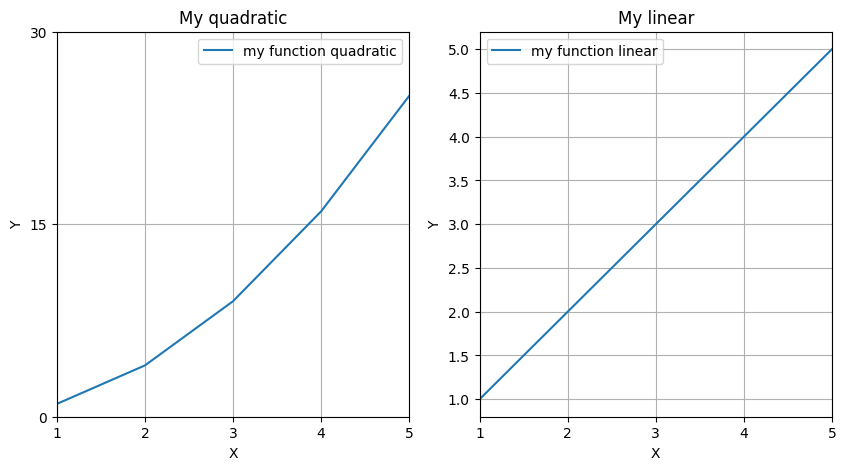

In [1]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5]
y1 = [1,4,9,16,25]
y2 = [1,2,3,4,5]

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.plot(x,y1, label='my function quadratic')
ax1.set_title("My quadratic")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xticks([0,1,2,3,4,5])
ax1.set_yticks([0,15,30])
ax1.set_xlim([1,5])
ax1.set_ylim([0,30])
ax1.legend()
ax1.grid()

ax2.plot(x,y2, label='my function linear')
ax2.set_title("My linear")
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_xticks([0,1,2,3,4,5])
ax2.set_xlim([1,5])
ax2.legend()
ax2.grid()

plt.show()

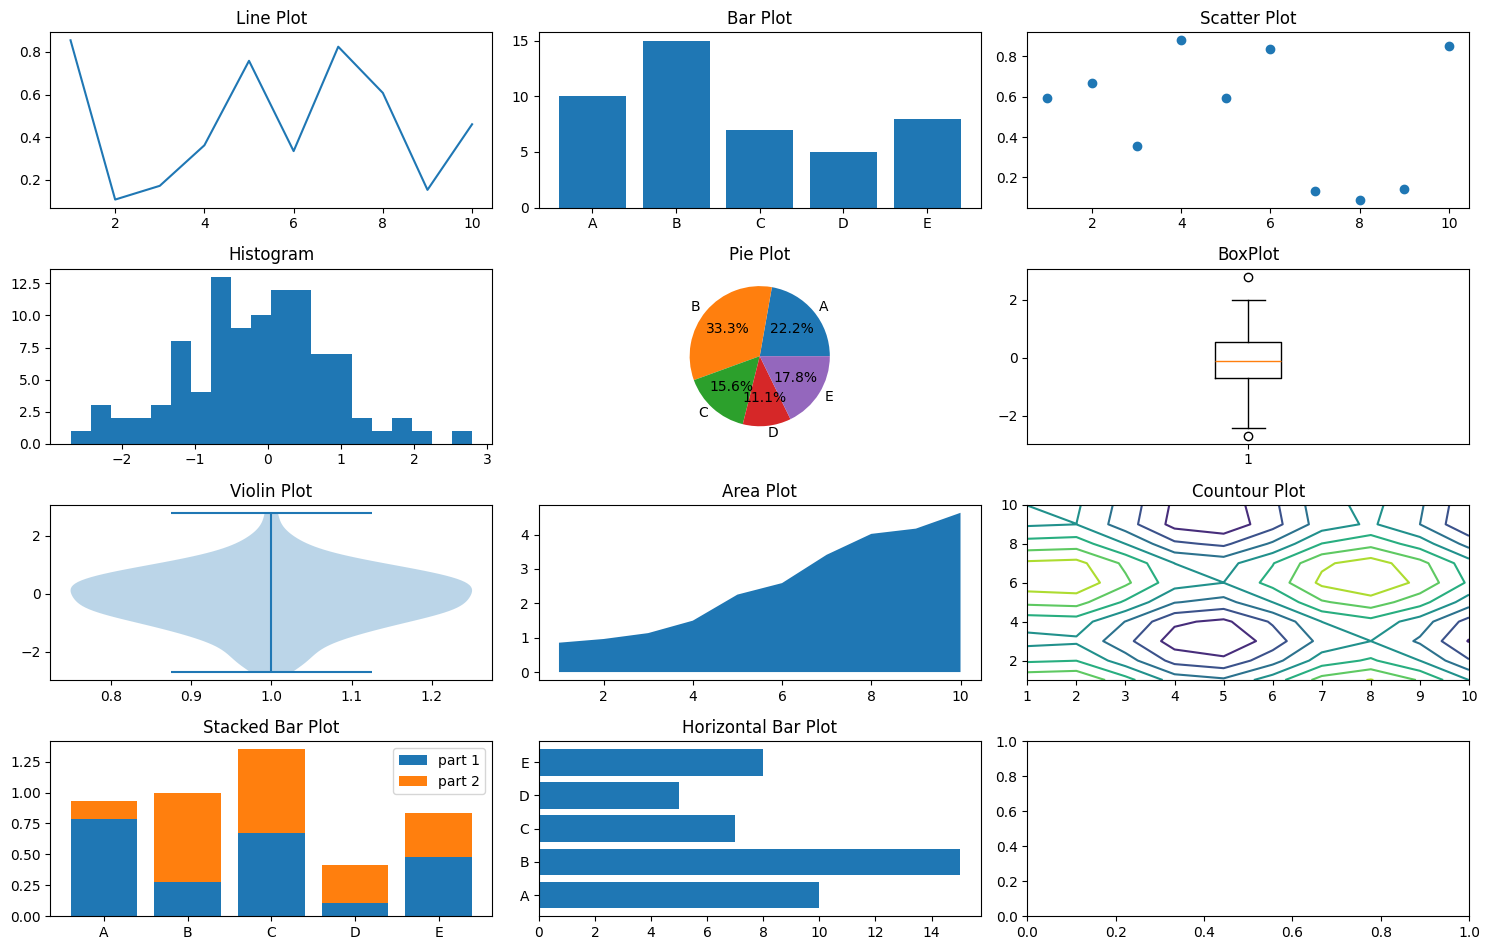

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(1,10,10)
y = np.random.rand(10)
categories = ['A', 'B', 'C', 'D', 'E']
values = [10, 15, 7, 5, 8]
data = np.random.randn(100)
y_cum = np.cumsum(y)

fig, ax = plt.subplots(4,3, figsize=(15,10))
ax[0,0].plot(x,y)
ax[0,0].set_title('Line Plot')

ax[0,1].bar(categories, values)
ax[0,1].set_title('Bar Plot')

ax[0,2].scatter(x,np.random.rand(10))
ax[0,2].set_title('Scatter Plot')

ax[1,0].hist(data,bins=20)
ax[1,0].set_title('Histogram')

ax[1,1].pie(values,labels=categories, autopct='%1.1f%%')
ax[1,1].set_title('Pie Plot')

ax[1,2].boxplot(data)
ax[1,2].set_title('BoxPlot')

ax[2,0].violinplot(data)
ax[2,0].set_title('Violin Plot')

ax[2,1].fill_between(x, y_cum)
ax[2,1].set_title('Area Plot')

X,Y = np.meshgrid(x,x)
# Z = np.sin(X)**10 + np.cos(10+ Y * X / np.pi)
Z = np.sin(X) + np.cos(Y)

ax[2,2].contour(X, Y, Z)
ax[2,2].set_title('Countour Plot')

bars1 = np.random.rand(5)
bars2 = np.random.rand(5)

ax[3,0].bar(categories, bars1, label='part 1')
ax[3,0].bar(categories, bars2, bottom=bars1, label='part 2')
ax[3,0].set_title('Stacked Bar Plot')
ax[3,0].legend()

ax[3,1].barh(categories, values)
ax[3,1].set_title('Horizontal Bar Plot')

plt.tight_layout(rect=[0,0,1,0.96])

plt.show()


## Estilizando gráficos



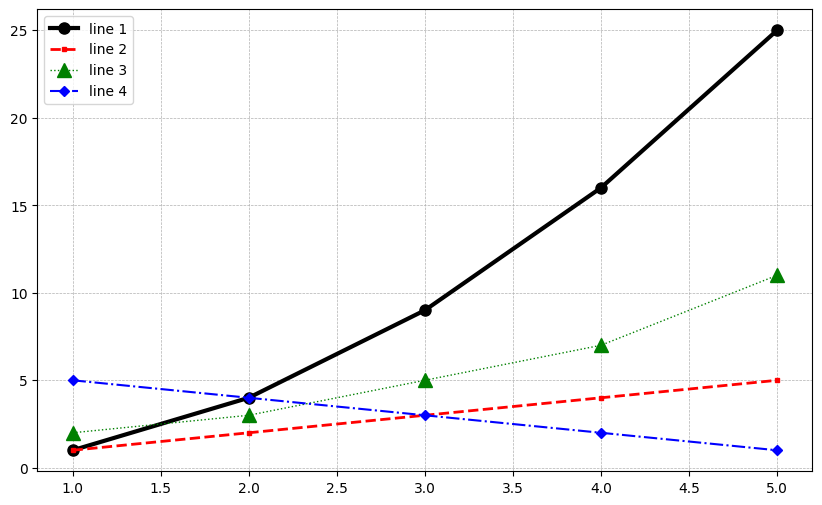

In [13]:
x = [1,2,3,4,5]
y1 = [1,4,9,16,25]
y2 = [1,2,3,4,5]
y3 = [2,3,5,7,11]
y4 = [5,4,3,2,1]

plt.figure(figsize=(10,6))

plt.plot(x,y1, color='black', ls='-',lw=3, marker='o', markersize=8, label='line 1')
plt.plot(x,y2, color='red', ls='--',lw=2, marker='s', markersize=3, label='line 2')
plt.plot(x,y3, color='green', ls=':',lw=1, marker='^', markersize=10, label='line 3')
plt.plot(x,y4, color='blue', ls='-.',lw=1.5, marker='D', markersize=5, label='line 4')
plt.legend()
plt.grid(True,which='both', ls='--', lw=0.5)
plt.show()


### salvando arquivos

# plt.savefig('plot.png')
# plt.savefig('plot.pdf')


# Seaborn

Mais estiloso e profissional


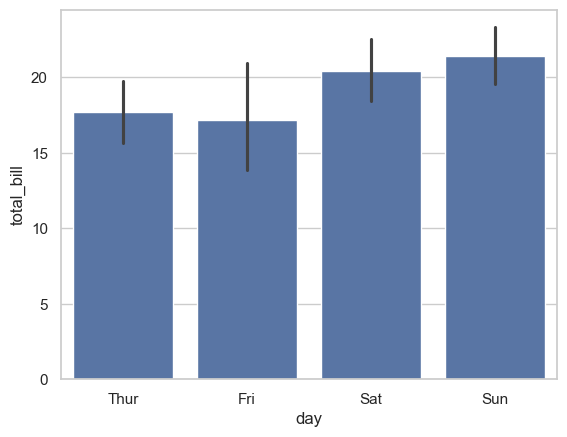

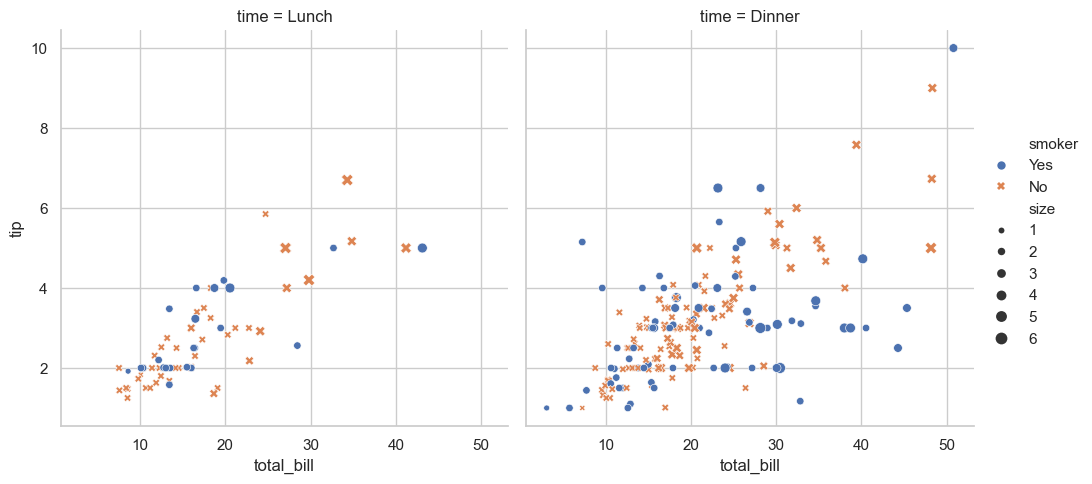

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')

sns.set_theme(style='whitegrid', context='notebook', palette='deep') # aqui é o coração, ver documentação para as outras opções

sns.barplot(x='day', y='total_bill', data=tips)

sns.relplot(
    data=tips,
    x='total_bill', y='tip', col='time', # para cada col (categorica), um grafico
    hue='smoker', style='smoker', size='size',
)


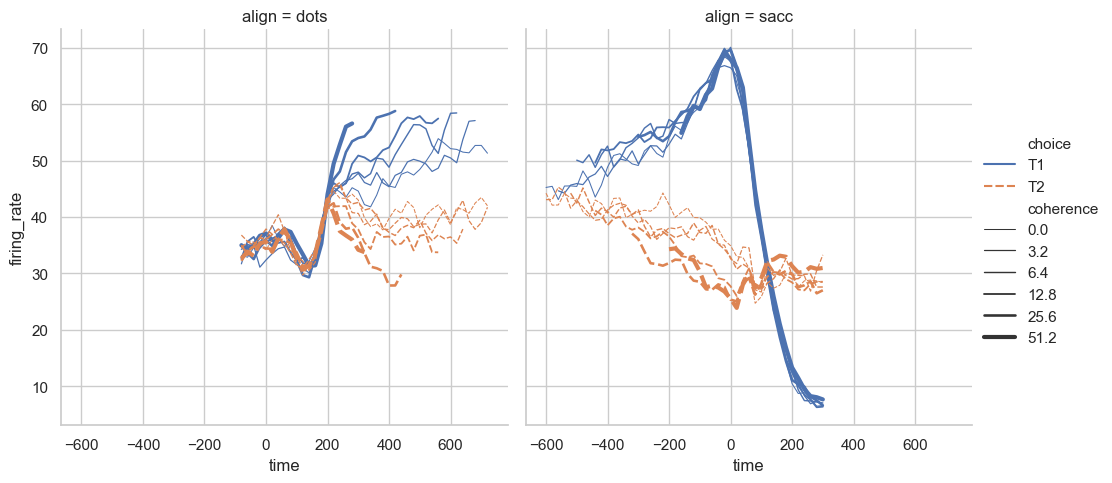

In [ ]:
# exemplo usando relchoice do tipo linha

dots = sns.load_dataset('dots')

sns.relplot(
    data=dots,
    kind='line',
    x='time',
    y='firing_rate',
    col='align',
    hue='choice',
    style='choice',
    size='coherence'

)

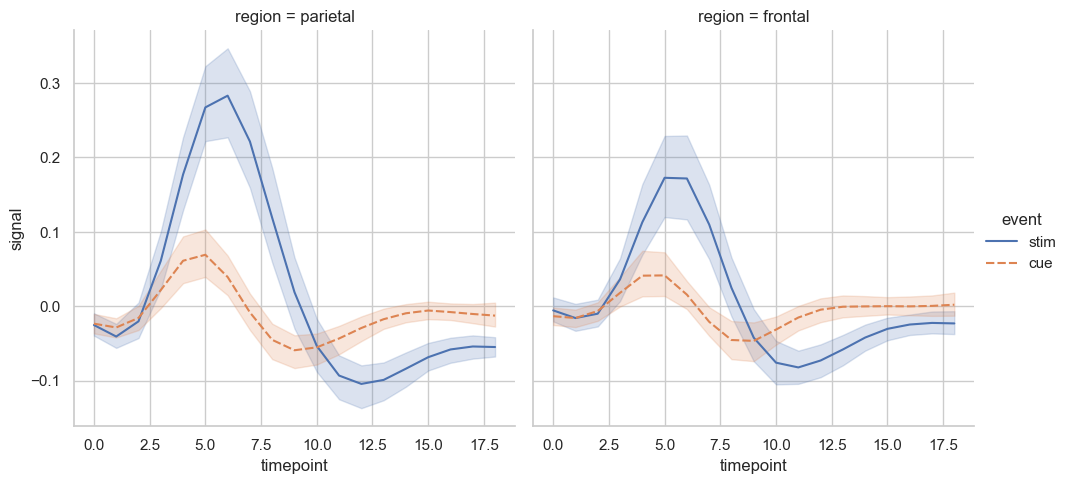

In [20]:
# usando intervalo de confiança na plotagem

fmri = sns.load_dataset('fmri')

sns.relplot(
    data=fmri,
    kind='line',
    x='timepoint',
    y='signal',
    col='region',
    hue='event',
    style='event',

)

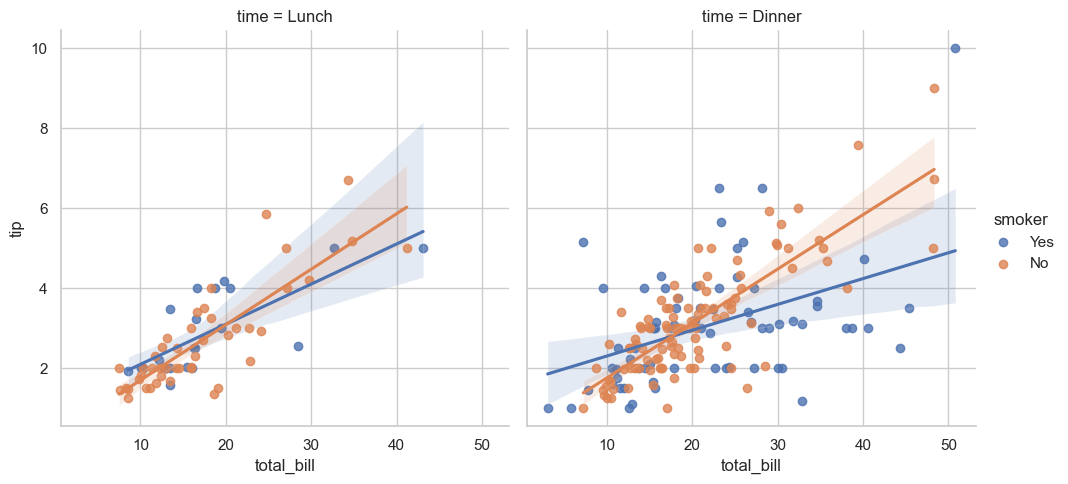

In [21]:
# incluindo reta de regressao com intervalo de confiança

sns.lmplot(
    data=tips,
    x='total_bill',
    y='tip',
    col='time',
    hue='smoker'
)

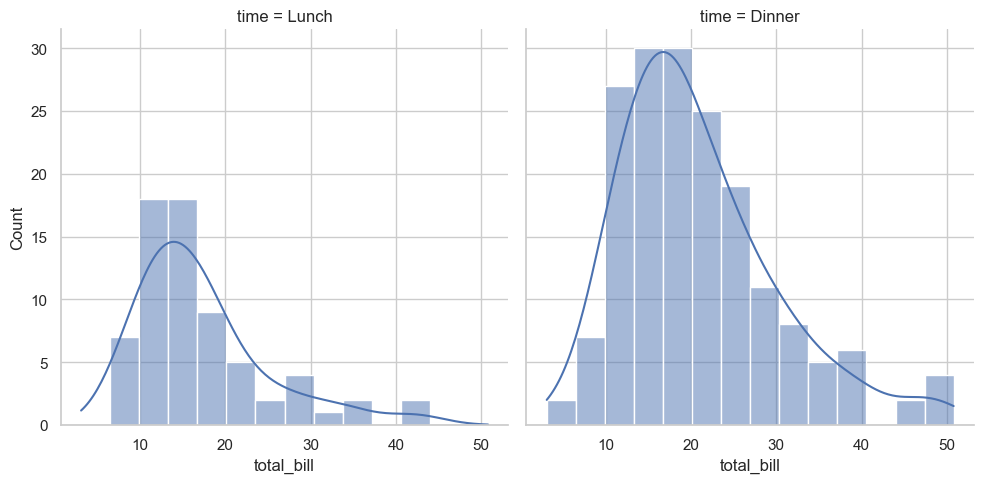

In [22]:
# displot para histogramas

sns.displot(
    data=tips,
    x='total_bill',
    col='time',
    kde=True
)

In [2]:
# code from chat-gpt and ace-tools

import seaborn as sns
import pandas as pd

# Load the 'tips' dataset
tips = sns.load_dataset('tips')

# Separate Lunch and Dinner data
lunch_data = tips[tips['time'] == 'Lunch']['total_bill']
dinner_data = tips[tips['time'] == 'Dinner']['total_bill']

# Calculate statistical summaries for Lunch and Dinner
summary_stats = {
    'Statistic': ['Count', 'Mean', 'Median', 'Standard Deviation', 'Min', 'Max', 'Range', 'Skewness'],
    'Lunch': [
        lunch_data.count(),
        lunch_data.mean(),
        lunch_data.median(),
        lunch_data.std(),
        lunch_data.min(),
        lunch_data.max(),
        lunch_data.max() - lunch_data.min(),
        lunch_data.skew(),
    ],
    'Dinner': [
        dinner_data.count(),
        dinner_data.mean(),
        dinner_data.median(),
        dinner_data.std(),
        dinner_data.min(),
        dinner_data.max(),
        dinner_data.max() - dinner_data.min(),
        dinner_data.skew(),
    ]
}

# Convert to DataFrame
summary_df = pd.DataFrame(summary_stats)

# Use ace_tools to display the result interactively
import ace_tools as tools
tools.display_dataframe_to_user("Total Bill Summary for Lunch and Dinner", summary_df)


ModuleNotFoundError: No module named 'ace_tools'

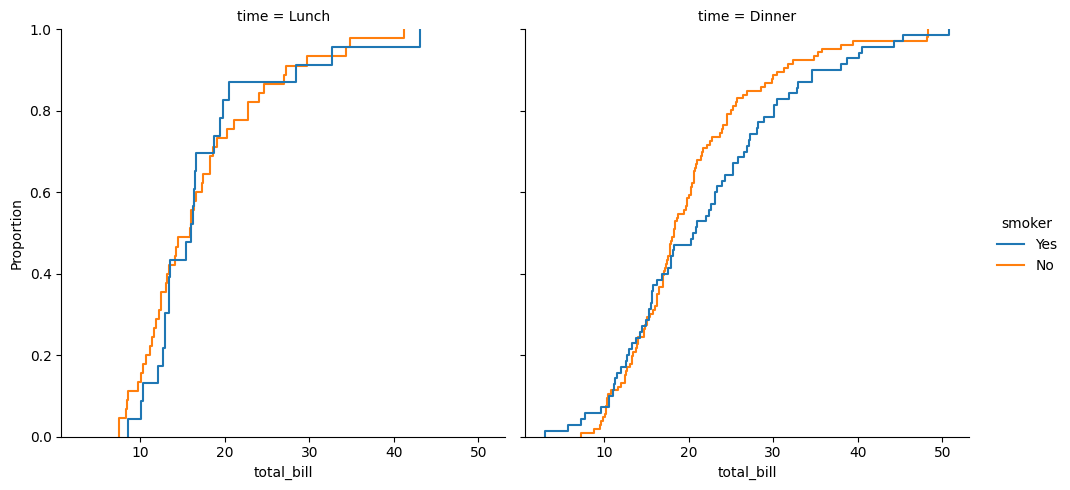

In [7]:
# distribuição de probabilidade acumulada

sns.displot(
    data=tips,
    kind='ecdf',
    x='total_bill',
    col='time',
    hue='smoker'
)

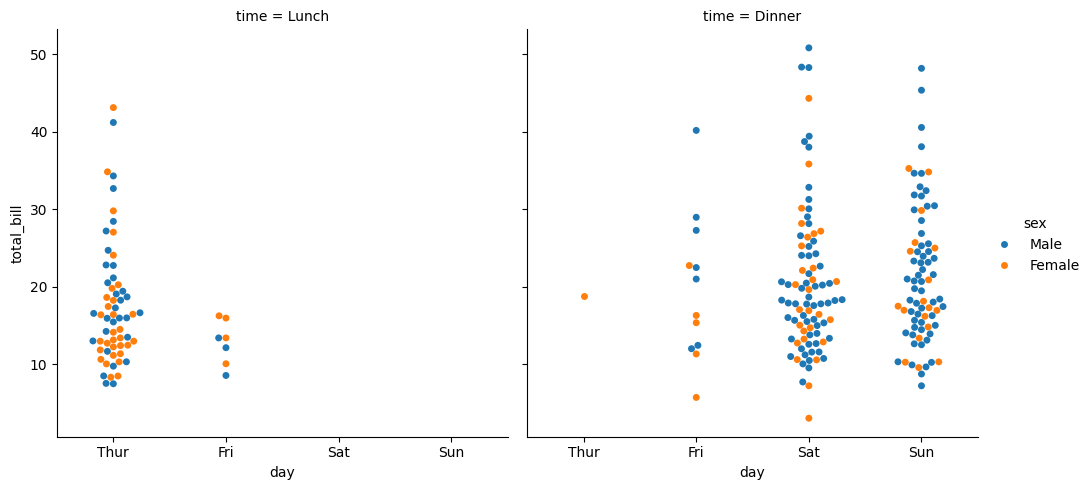

In [ ]:
# catplot padrao

sns.catplot(
    x='day',
    y='total_bill',
    hue='sex',
    kind='swarm',
    col='time',
    data=tips,
)

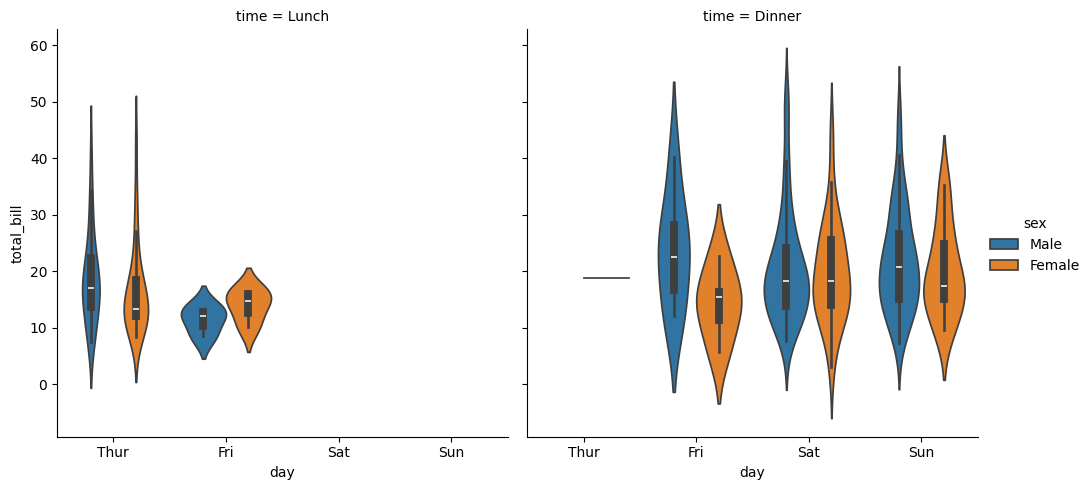

In [10]:
# catplot

sns.catplot(
    x='day',
    y='total_bill',
    hue='sex',
    kind='violin',
    col='time',
    data=tips,
)

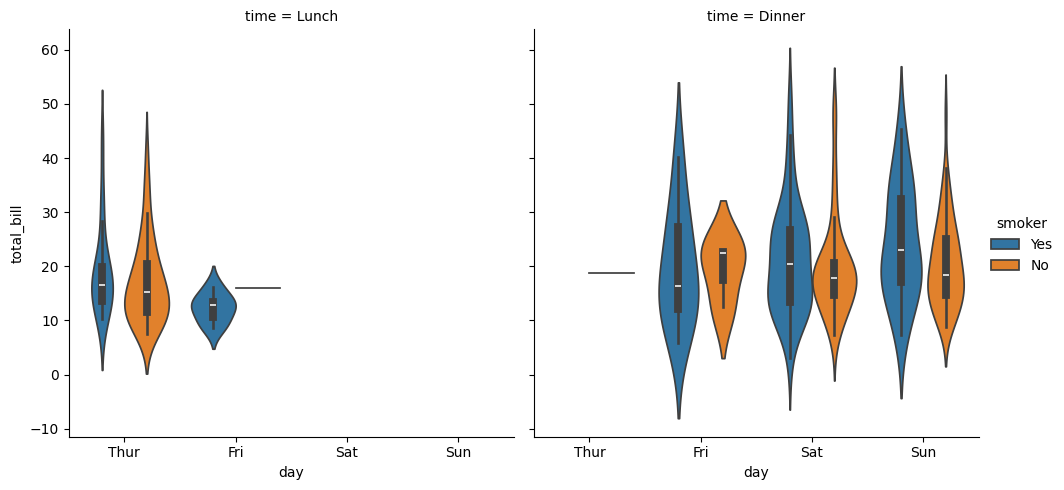

In [11]:
# catplot usando violin plot
sns.catplot(
    x='day',
    y='total_bill',
    hue='smoker',
    kind='violin',
    col='time',
    data=tips,
)

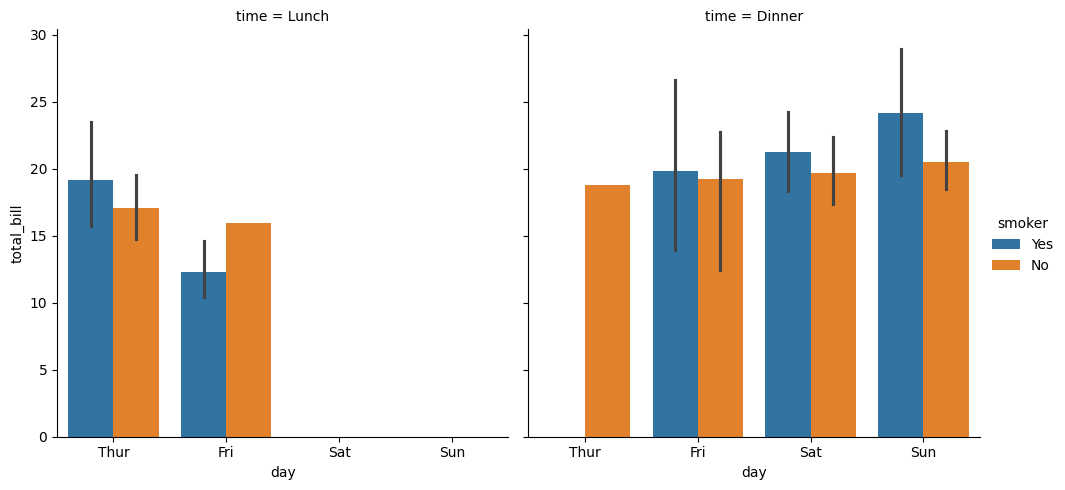

In [12]:
# catplot usando bar

sns.catplot(
    x='day',
    y='total_bill',
    hue='smoker',
    kind='bar',
    col='time',
    data=tips,
)

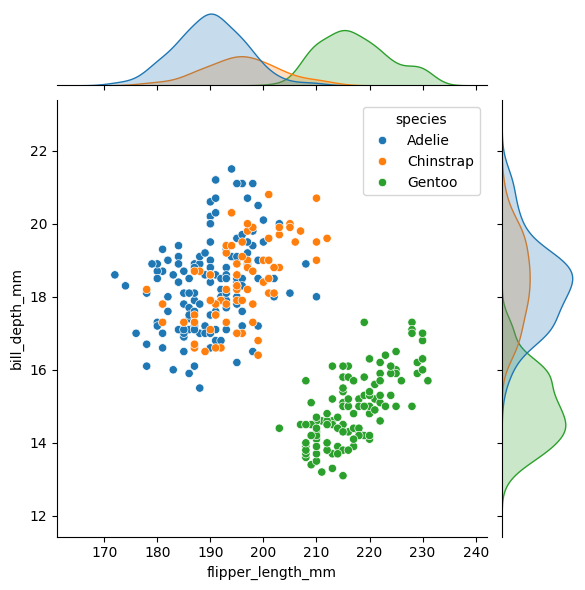

In [15]:
# usando joinplot
penguins = sns.load_dataset('penguins')

sns.jointplot(
    data=penguins,
    x='flipper_length_mm',
    y='bill_depth_mm',
    hue='species'
)

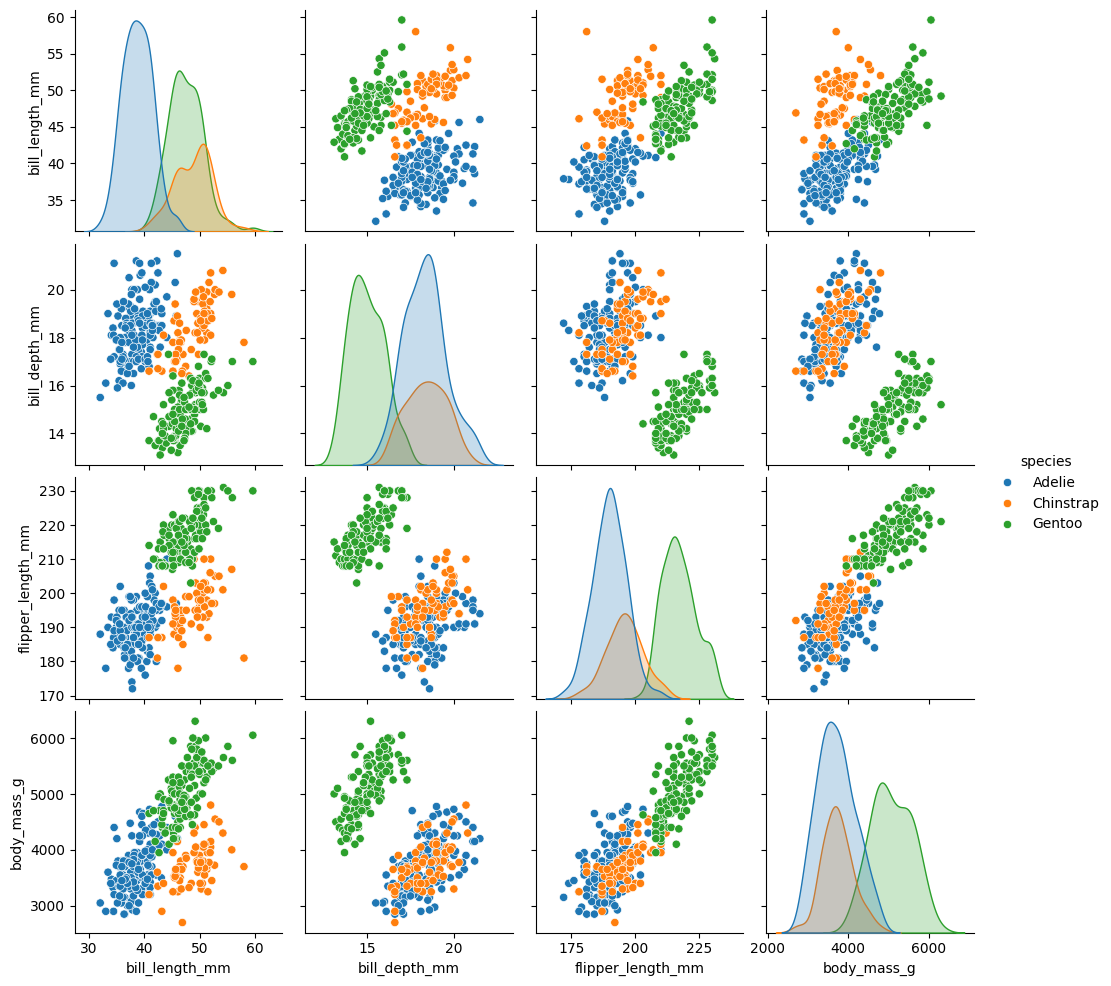

In [14]:
sns.pairplot(
    data=penguins,
    hue='species'
)